In [15]:
import pickle
from collections import defaultdict

with open("/srv/flash1/pputta7/projects/lm-nav/data/datasets/lmnav/offline_10envs_clip/stats.pkl", "rb") as f:
    data = pickle.load(f)

In [16]:
scene_ids = data['scene_ids']
unique_scene_ids = list(set(scene_ids))
episode_ids = data['episode_ids']

scene = unique_scene_ids[0]
episodes_per_scene = [episode_ids[i] for i in range(len(episode_ids)) if scene_ids[i] == scene]

counts = defaultdict(lambda: 0)
for item in episodes_per_scene:
    counts[item] += 1

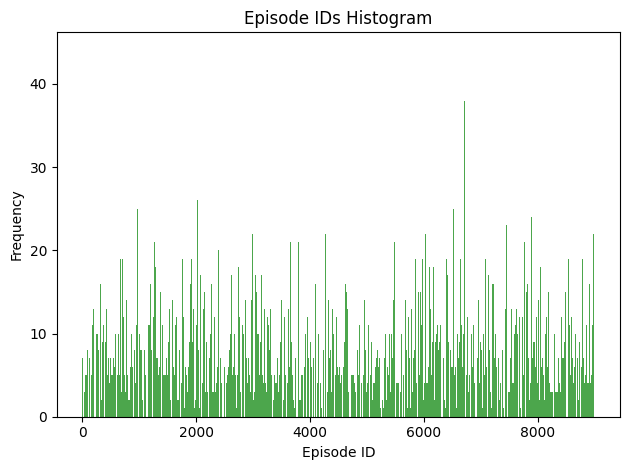

In [17]:
from matplotlib import pyplot as plt

plt.hist(episode_ids, bins=len(set(episode_ids)), color='green', alpha=0.7)
plt.title('Episode IDs Histogram')
plt.xlabel('Episode ID')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
len(set(episode_ids))

6804